In [2]:

import gc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
from scipy.stats import f_oneway
from collections import Counter

CLINICAL DATA ANALYSIS

In [5]:
df_clinic = []
tmp = pd.read_csv("train_clinical_data.csv")
tmp["CSF"] = 1
df_clinic.append(tmp)
tmp = pd.read_csv("supplemental_clinical_data.csv")
tmp["CSF"] = 0
df_clinic.append(tmp)
df_clinic = pd.concat(df_clinic, axis=0).reset_index(drop=True)
df_clinic = df_clinic.rename(columns={"upd23b_clinical_state_on_medication": "medication"})

del tmp; gc.collect()

0

In [6]:
df_clinic.head(10)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,medication,CSF
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN,1
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN,1
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN,1
3,55_9,55,9,8.0,9.0,30.0,0.0,On,1
4,55_12,55,12,10.0,10.0,41.0,0.0,On,1
5,55_18,55,18,7.0,13.0,38.0,0.0,On,1
6,55_24,55,24,16.0,9.0,49.0,0.0,On,1
7,55_30,55,30,14.0,13.0,49.0,0.0,On,1
8,55_36,55,36,17.0,18.0,51.0,0.0,On,1
9,55_42,55,42,12.0,20.0,41.0,0.0,On,1


In [7]:
df_clinic.tail(10)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,medication,CSF
4828,65290_12,65290,12,4.0,14.0,13.0,0.0,On,0
4829,65290_24,65290,24,2.0,13.0,14.0,2.0,On,0
4830,65290_30,65290,30,4.0,16.0,13.0,0.0,On,0
4831,65303_0,65303,0,0.0,2.0,20.0,0.0,NaN,0
4832,65303_36,65303,36,4.0,1.0,26.0,0.0,NaN,0
4833,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN,0
4834,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN,0
4835,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN,0
4836,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN,0
4837,65530_36,65530,36,8.0,4.0,15.0,4.0,On,0


In [111]:
df_clinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4838 entries, 0 to 4837
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   visit_id     4838 non-null   object 
 1   patient_id   4838 non-null   int64  
 2   visit_month  4838 non-null   int64  
 3   updrs_1      4624 non-null   float64
 4   updrs_2      4622 non-null   float64
 5   updrs_3      4808 non-null   float64
 6   updrs_4      2872 non-null   float64
 7   medication   2410 non-null   object 
 8   CSF          4838 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 340.3+ KB


In [112]:
df_clinic.isna().sum()

visit_id          0
patient_id        0
visit_month       0
updrs_1         214
updrs_2         216
updrs_3          30
updrs_4        1966
medication     2428
CSF               0
dtype: int64

In [113]:
df_clinic.nunique()

visit_id       4838
patient_id     1019
visit_month      18
updrs_1          32
updrs_2          37
updrs_3          75
updrs_4          19
medication        2
CSF               2
dtype: int64

The number of visits

In [114]:
df_clinic.groupby("patient_id").size().describe()

count    1019.000000
mean        4.747792
std         4.050538
min         1.000000
25%         2.000000
50%         2.000000
75%         6.000000
max        17.000000
dtype: float64

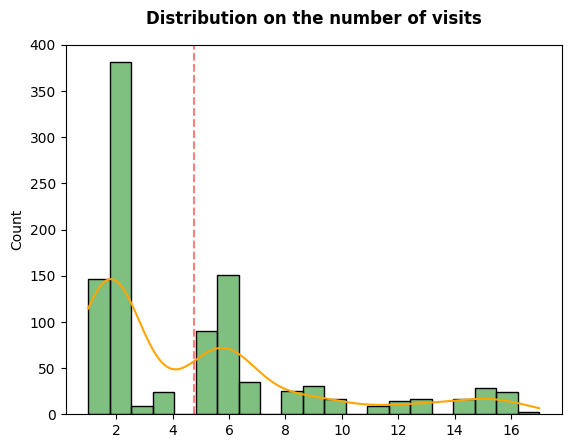

In [115]:
ax = sns.histplot(df_clinic.groupby("patient_id").size().values, color="green", kde=True)
ax.lines[0].set_color('orange')
# Red line is mean
plt.axvline(df_clinic.groupby("patient_id").size().describe()["mean"], color="red", alpha=0.5, linestyle="--")
plt.title("Distribution on the number of visits", fontweight="bold", pad=15)
plt.show()

In [116]:
# The number of nan values
for i in range(4):
    print(f"na values : udprs_{i+1}")
    print(df_clinic[f"updrs_{i+1}"].isna().sum() / len(df_clinic[f"updrs_{i+1}"]), "\n")

na values : udprs_1
0.04423315419594874 

na values : udprs_2
0.04464654816039686 

na values : udprs_3
0.0062009094667217855 

na values : udprs_4
0.406366267052501 



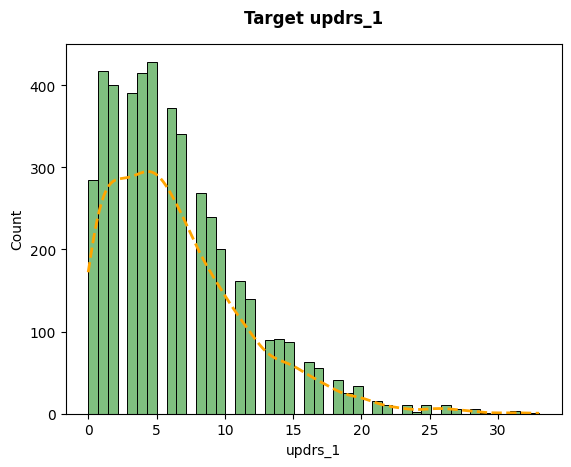

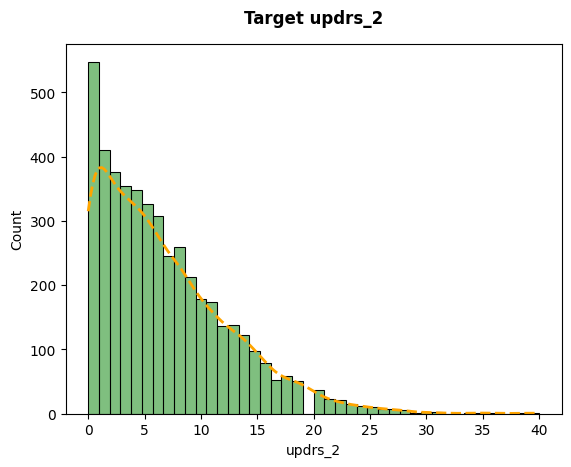

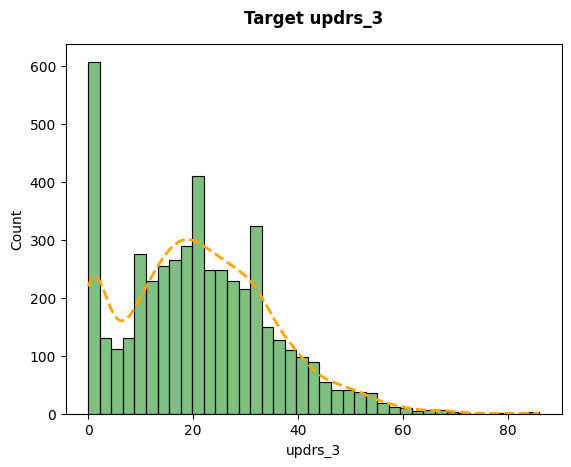

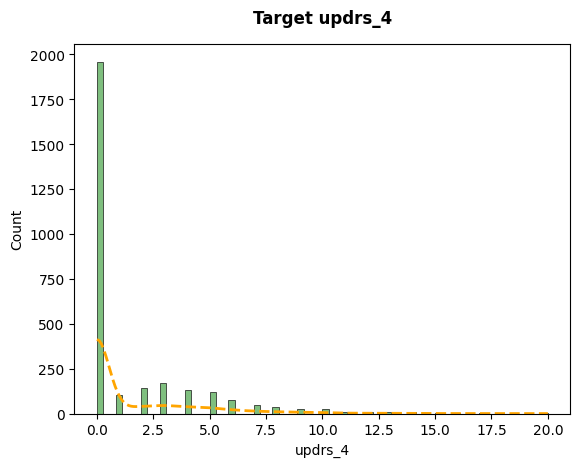

In [117]:
for i in range(4):
    ax = sns.histplot(df_clinic[f"updrs_{i+1}"], kde=True, color="green", line_kws={'linewidth': 2, 'linestyle': '--'})
    ax.lines[0].set_color('orange')
    plt.title(f"Target updrs_{i+1}", fontweight="bold", pad=15)
    plt.show()

All targets are not normal distribution

updrs_4 has zeros as much as about 40% (It seems to be good to impute with zeros)

In [118]:
df_clinic.filter(regex="updrs_*")

,updrs_1,updrs_2,updrs_3,updrs_4
0,10.0,6.0,15.0,NaN
1,10.0,7.0,25.0,NaN
2,8.0,10.0,34.0,NaN
3,8.0,9.0,30.0,0.0
4,10.0,10.0,41.0,0.0
...,...,...,...,...
4833,NaN,NaN,0.0,NaN
4834,5.0,16.0,31.0,0.0
4835,NaN,NaN,57.0,NaN
4836,10.0,6.0,24.0,0.0


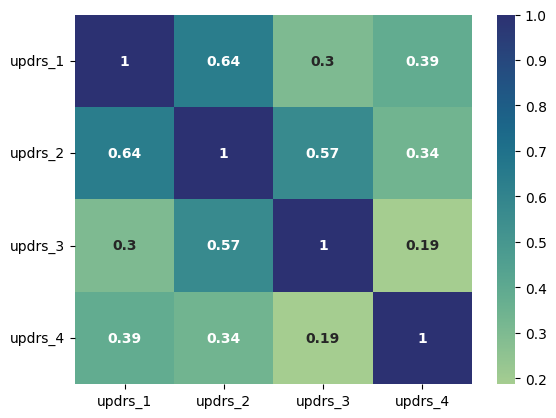

In [119]:
sns.heatmap(df_clinic.filter(regex="updrs_*").dropna().corr(), cmap="crest", annot=True, annot_kws={"fontweight": "bold"})
plt.yticks(rotation=0)
plt.show()

updrs_2 has high correlation with updrs_1 & updrs_3 (about 0.6)

In [120]:
df_eda = df_clinic.groupby("patient_id")["visit_month"].max()

In [121]:
df_eda.describe()

count    1019.000000
mean       33.411187
std        26.484097
min         0.000000
25%         5.000000
50%        30.000000
75%        36.000000
max       108.000000
Name: visit_month, dtype: float64

In [122]:
df_eda.value_counts().sort_index()

0      146
5      118
6        5
12       7
18       4
24      18
30     228
36     277
42      11
48      28
54       6
60      44
72      22
84      46
96      47
108     12
Name: visit_month, dtype: int64

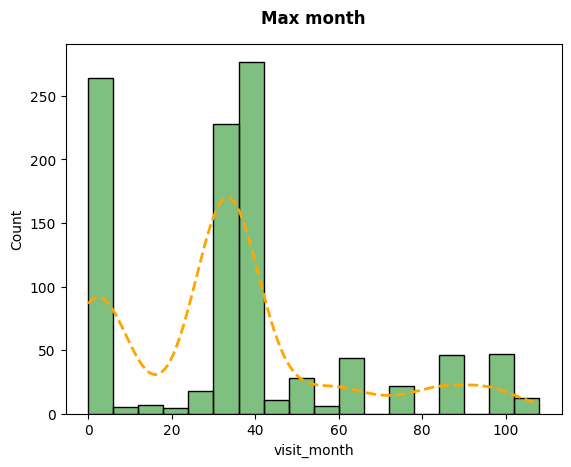

In [123]:
ax = sns.histplot(df_eda, kde=True, color="green", line_kws={'linewidth': 2, 'linestyle': '--'})
ax.lines[0].set_color('orange')
plt.title(f"Max month", fontweight="bold", pad=15)
plt.show()

Short-term(0-5) and mid-term(30-36) bins show high medical examination count

In [124]:
df_eda = df_clinic.groupby("visit_month", as_index=False).mean().dropna()

In [125]:
df_eda

,visit_month,patient_id,updrs_1,updrs_2,updrs_3,updrs_4,CSF
0,0,32284.550540,5.725108,5.734848,18.312684,1.186517,0.243376
1,3,33128.895652,5.513043,6.634783,20.482456,0.142857,1.000000
3,6,33402.718182,5.938636,6.670455,22.143836,1.427419,0.436364
4,9,33544.020202,6.080808,7.204082,20.474747,0.488372,1.000000
5,12,32921.261506,5.736402,5.765690,19.726891,0.953668,0.508368
6,18,33228.782369,6.344353,6.776860,21.576177,0.938697,0.515152
7,24,32608.661327,6.304348,6.153318,19.889145,1.290850,0.556064
8,30,33159.085859,6.739899,7.043038,22.650633,1.260736,0.436869
9,36,31899.322314,6.981405,6.764463,20.160083,1.042857,0.466942
10,42,32411.733766,8.339869,8.372549,22.720779,1.868613,1.000000


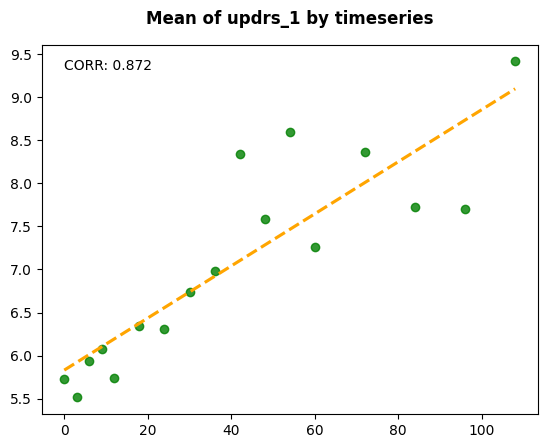

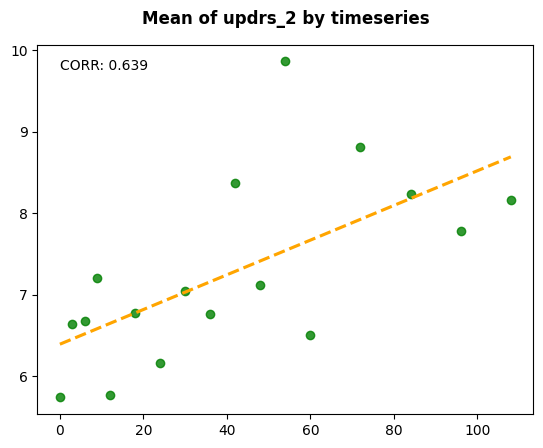

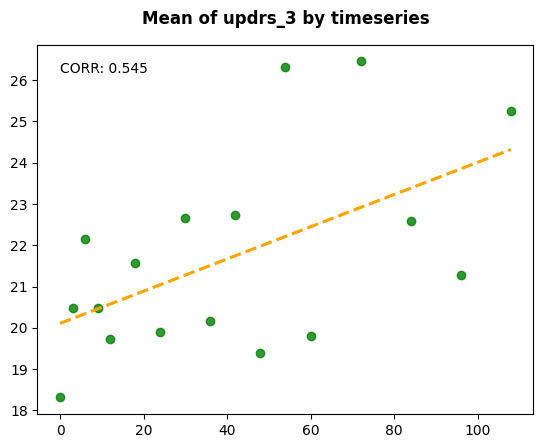

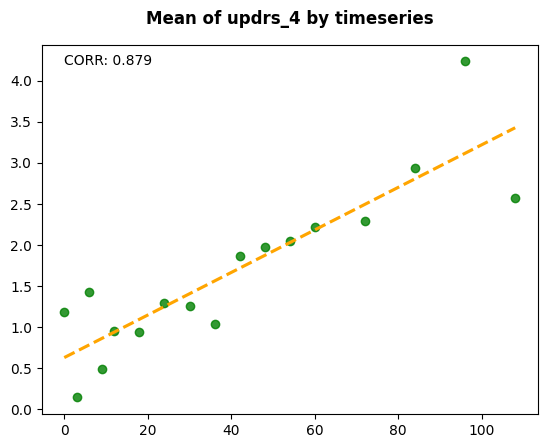

In [126]:
for i in range(4):    
    sns.regplot(x=df_eda["visit_month"].values, y=df_eda[f"updrs_{i+1}"].values, color="green", ci=None, line_kws={"color": "orange", "linestyle": "--"})
    plt.title(f"Mean of updrs_{i+1} by timeseries", fontweight="bold", pad=15)
    plt.text(0, df_eda[f"updrs_{i+1}"].values.max() * 0.99, f'CORR: {round(df_eda.corr().loc["visit_month", f"updrs_{i+1}"], 3)}')
    plt.show()

In [127]:
df_eda = df_clinic.dropna()

Two groups are difference ! -> pvalue: 0.00248


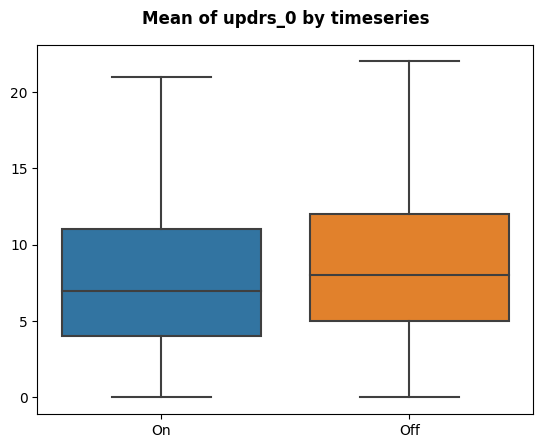

Two groups are difference ! -> pvalue: 0.0


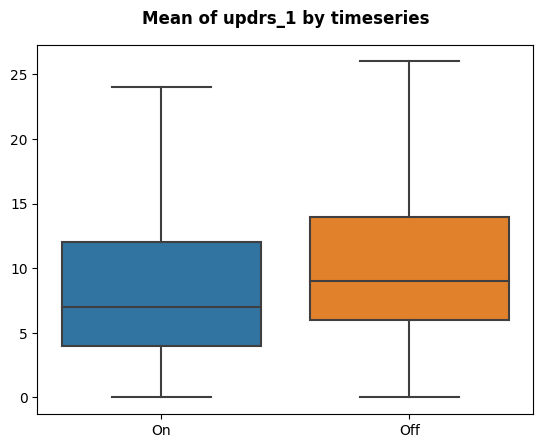

Two groups are difference ! -> pvalue: 0.0


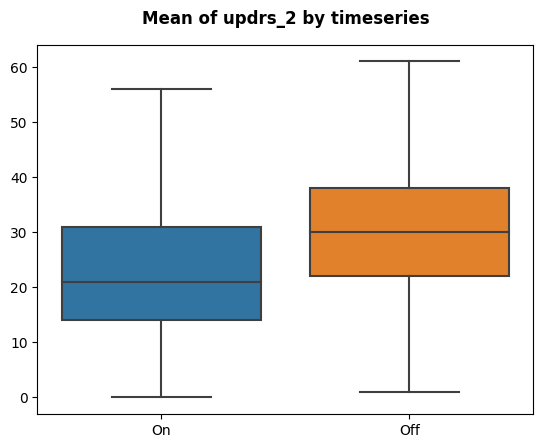

Two groups are difference ! -> pvalue: 0.00078


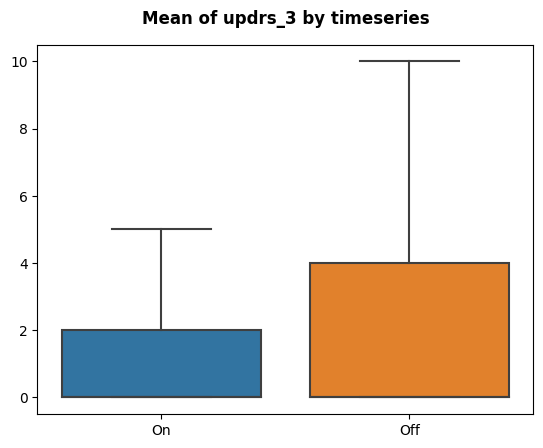

In [128]:
for i in range(4):    
    sns.boxplot(x=df_eda["medication"].values, y=df_eda[f"updrs_{i+1}"].values, showfliers=False)
    plt.title(f"Mean of updrs_{i} by timeseries", fontweight="bold", pad=15)
    _, pvalue = f_oneway(df_eda.loc[df_eda["medication"] == "On", f"updrs_{i+1}"].values, df_eda.loc[df_eda["medication"] == "Off", f"updrs_{i+1}"].values)
    if pvalue < 0.05:
        print("Two groups are difference ! -> pvalue:", round(pvalue, 5))
    plt.show()

Medication is effective on reducing the updrs level

In [129]:
df_tmp = df_eda.groupby(["patient_id", "medication"]).size().reset_index(1)
check_list = [i for i in df_tmp.index if type(df_tmp.loc[i]) == pd.DataFrame]

In [130]:
len(df_tmp)

673

In [131]:
sum(check_list)

7786596

In [132]:
df_clinic[df_clinic["patient_id"].isin(check_list)].iloc[:10]

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,medication,CSF
28,1517_0,1517,0,11.0,6.0,25.0,5.0,On,1
29,1517_6,1517,6,17.0,4.0,30.0,7.0,On,1
30,1517_12,1517,12,20.0,11.0,32.0,5.0,On,1
31,1517_18,1517,18,23.0,14.0,25.0,5.0,On,1
32,1517_24,1517,24,19.0,11.0,28.0,3.0,On,1
33,1517_30,1517,30,20.0,15.0,39.0,10.0,Off,1
34,1517_36,1517,36,20.0,17.0,31.0,8.0,On,1
35,1517_42,1517,42,15.0,13.0,37.0,4.0,On,1
36,1517_48,1517,48,20.0,18.0,40.0,6.0,Off,1
37,1517_60,1517,60,19.0,18.0,39.0,10.0,Off,1


Some patients' medication are sometiems not applied

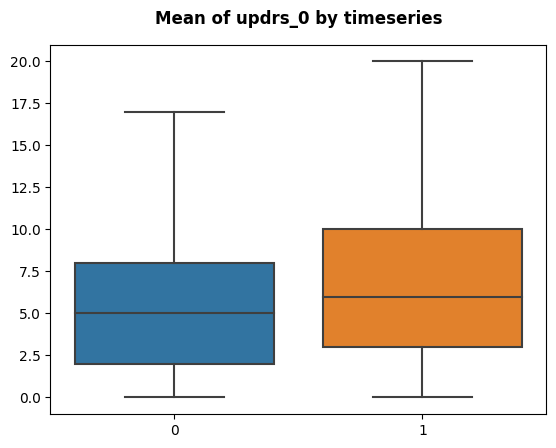

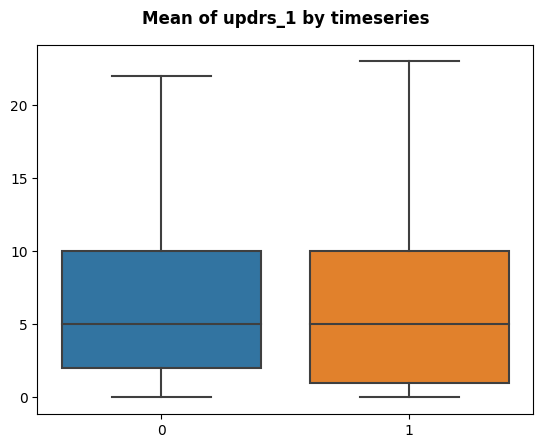

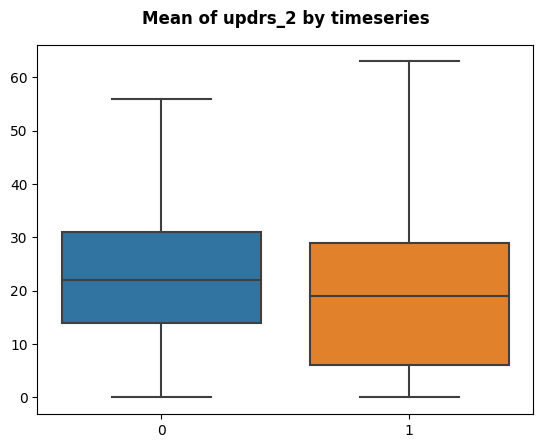

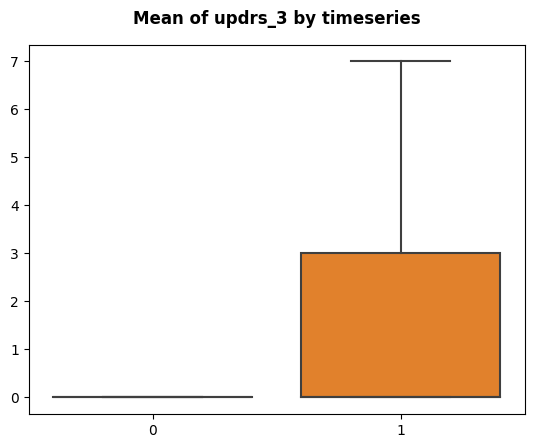

In [133]:
for i in range(4):  
    sns.boxplot(x=df_clinic["CSF"].values, y=df_clinic[f"updrs_{i+1}"].values, showfliers=False)
    plt.title(f"Mean of updrs_{i} by timeseries", fontweight="bold", pad=15)
    _, pvalue = f_oneway(df_clinic.loc[df_clinic["CSF"] == 1, f"updrs_{i+1}"].values, df_eda.loc[df_eda["CSF"] == 0, f"updrs_{i+1}"].values)
    if pvalue < 0.05:
        print("Two groups are difference ! -> pvalue:", round(pvalue, 5))
    plt.show()

Provided original data and additional data statistically has no difference mean in all ndprs values

Therefore, We can use additional data as same way as original data without anxiety which be able to have bias

SUMMARY OF CLINICAL DATA - 


All targets are not normal distribution

updrs_4 has zeros as much as about 40% (It seems to be good to impute with zeros)

Short-term(0-5) and mid-term(30-36) bins show high medical examination count

Medication is effective on reducing the updrs level

Some patients' medication are sometiems not applied

Provided original data and additional data statistically has no difference mean in all ndprs values

Therefore, We can use additional data as same way as original data without anxiety which be able to have bias

2. PROTEIN ANALYSIS


In [134]:
df_prot = pd.read_csv("train_proteins.csv")
df_prot.head(10)

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.30
1,55_0,0,55,O00533,732430.00
2,55_0,0,55,O00584,39585.80
3,55_0,0,55,O14498,41526.90
4,55_0,0,55,O14773,31238.00
5,55_0,0,55,O14791,4202.71
6,55_0,0,55,O15240,177775.00
7,55_0,0,55,O15394,62898.20
8,55_0,0,55,O43505,333376.00
9,55_0,0,55,O60888,166850.00


In [135]:
df_prot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232741 entries, 0 to 232740
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   visit_id     232741 non-null  object 
 1   visit_month  232741 non-null  int64  
 2   patient_id   232741 non-null  int64  
 3   UniProt      232741 non-null  object 
 4   NPX          232741 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.9+ MB


In [136]:
df_prot.isna().sum()

visit_id       0
visit_month    0
patient_id     0
UniProt        0
NPX            0
dtype: int64

In [137]:
df_prot.nunique()

visit_id         1113
visit_month        15
patient_id        248
UniProt           227
NPX            218795
dtype: int64

In [138]:
df_eda = df_prot.groupby("patient_id")["UniProt"].size()
df_eda.describe()

count     248.000000
mean      938.471774
std       324.826941
min       199.000000
25%       650.750000
50%       859.000000
75%      1089.000000
max      1929.000000
Name: UniProt, dtype: float64

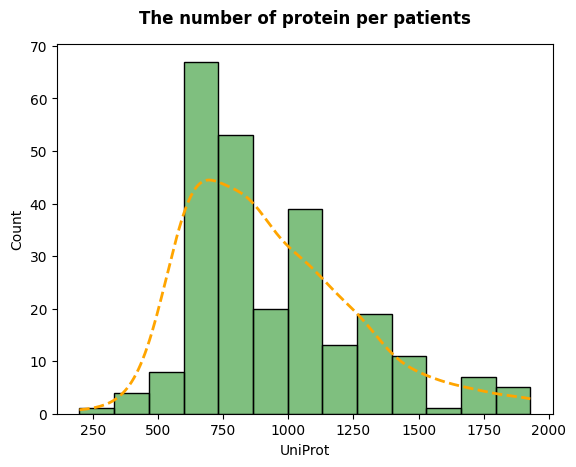

In [139]:
ax = sns.histplot(df_eda, kde=True, color="green", line_kws={'linewidth': 2, 'linestyle': '--'})
ax.lines[0].set_color('orange')
plt.title(f"The number of protein per patients", fontweight="bold", pad=15)
plt.show()

count    2.327410e+05
mean     2.712077e+06
std      2.224155e+07
min      8.460820e+01
25%      2.946440e+04
50%      1.135560e+05
75%      5.638940e+05
max      6.138510e+08
Name: NPX, dtype: float64

<Axes: xlabel='NPX'>

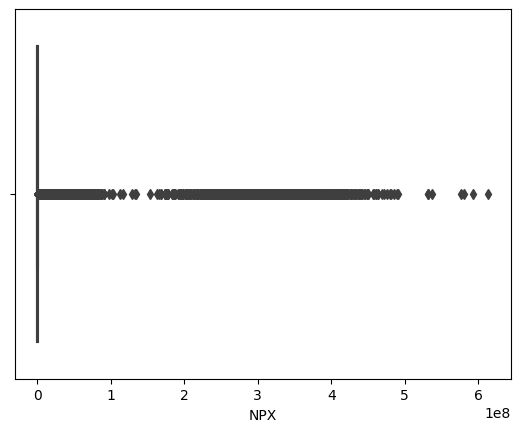

In [140]:
# No Trasnformation
display(df_prot["NPX"].describe())
sns.boxplot(x=df_prot["NPX"])

count    232741.000000
mean         11.878676
std           2.070008
min           4.449781
25%          10.290972
50%          11.640060
75%          13.242623
max          20.235263
Name: NPX, dtype: float64

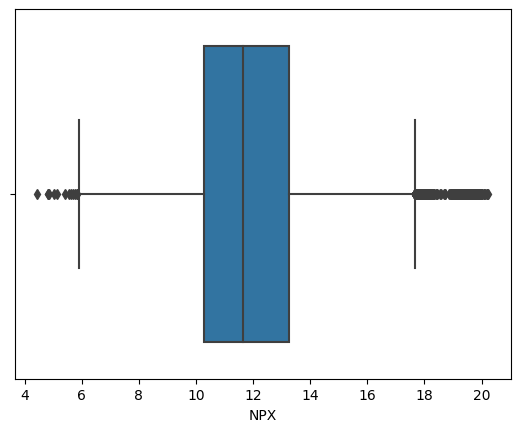

In [141]:
# Log Transformation
display(np.log1p(df_prot["NPX"]).describe())
sns.boxplot(x=np.log1p(df_prot["NPX"]))
plt.show()

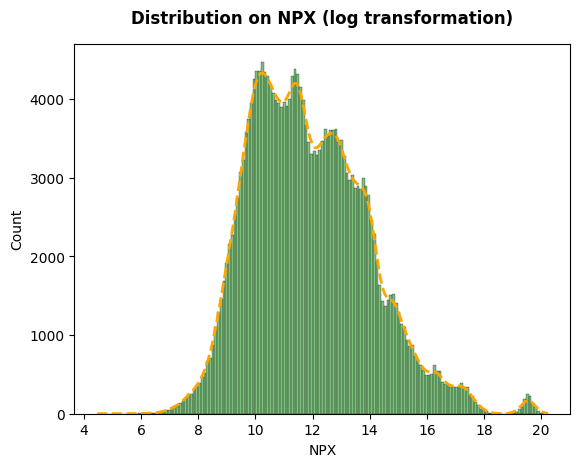

In [142]:
ax = sns.histplot(np.log1p(df_prot["NPX"]), kde=True, color="green", line_kws={'linewidth': 2, 'linestyle': '--'})
ax.lines[0].set_color('orange')
plt.title(f"Distribution on NPX (log transformation)", fontweight="bold", pad=15)
plt.show()

NPX seems to increase exponentialy (After log transformation, it shapes normal distribution)

In [143]:
df_eda = df_prot.copy()
df_eda["NPX"] = np.log1p(df_eda["NPX"])
df_eda = df_eda.groupby("patient_id")["NPX"].mean()
df_eda.describe()

count    248.000000
mean      11.878198
std        0.124295
min       11.543346
25%       11.800891
50%       11.877745
75%       11.963245
max       12.263111
Name: NPX, dtype: float64

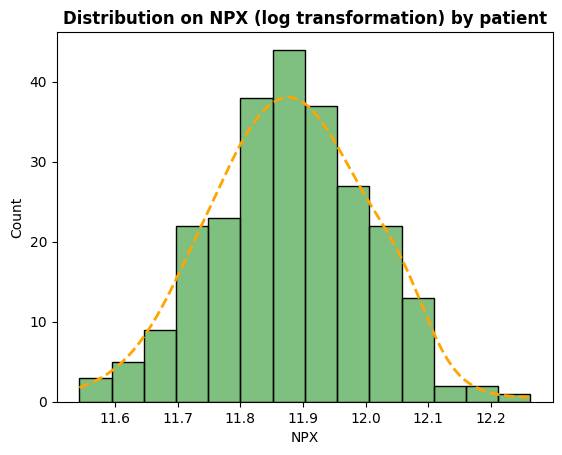

In [144]:
ax = sns.histplot(df_eda, kde=True, color="green", line_kws={'linewidth': 2, 'linestyle': '--'})
ax.lines[0].set_color('orange')
plt.title(f"Distribution on NPX (log transformation) by patient", fontweight="bold")
plt.show()

By patient, average of mean is about 11.88

In view of patient, It looks like perfectly noraml distribution more than overall NPX

In [145]:
df_eda = df_prot.copy()
df_eda["NPX"] = np.log1p(df_eda["NPX"])
df_eda = df_eda.groupby("UniProt")["NPX"].mean()
df_eda.describe()

count    227.000000
mean      11.728923
std        2.039083
min        7.591763
25%       10.145062
50%       11.463307
75%       13.093936
max       19.529490
Name: NPX, dtype: float64

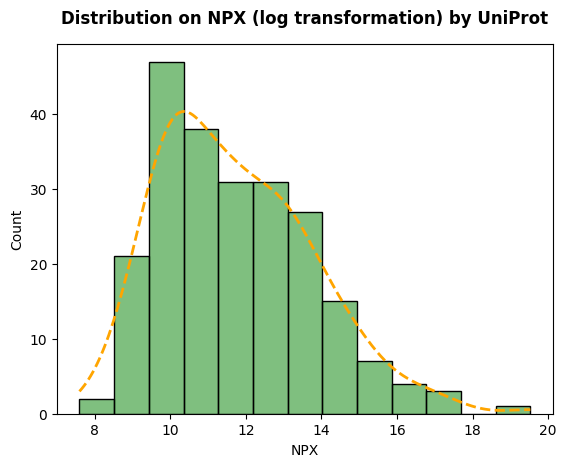

In [146]:
ax = sns.histplot(df_eda, kde=True, color="green", line_kws={'linewidth': 2, 'linestyle': '--'})
ax.lines[0].set_color('orange')
plt.title(f"Distribution on NPX (log transformation) by UniProt", fontweight="bold", pad=15)
plt.show()

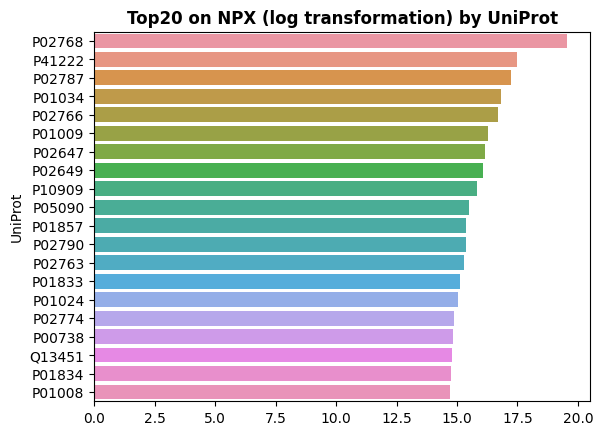

In [147]:
sns.barplot(x=df_eda.sort_values(ascending=False).values[:20], y=df_eda.sort_values(ascending=False).index[:20])
plt.title(f"Top20 on NPX (log transformation) by UniProt", fontweight="bold")
plt.show()

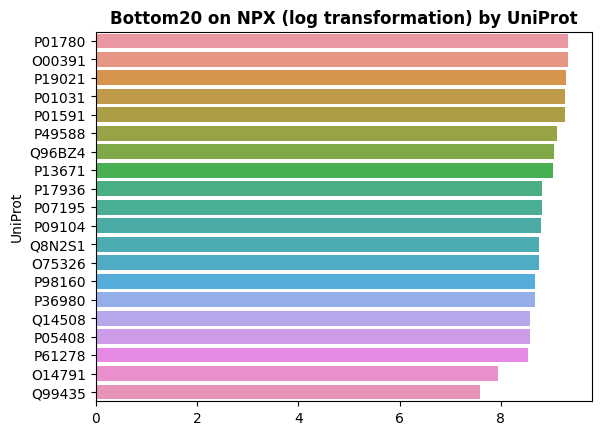

In [148]:
sns.barplot(x=df_eda.sort_values(ascending=False).values[-20:], y=df_eda.sort_values(ascending=False).index[-20::])
plt.title(f"Bottom20 on NPX (log transformation) by UniProt", fontweight="bold")
plt.show()

Some proteins shows high NPX values than others

Therefore, it is important which protein the patient has

In [149]:
tmp = df_prot.copy()
tmp["NPX"] = np.log1p(tmp["NPX"])

df_eda = df_clinic.merge(tmp.groupby("visit_id").mean().rename(columns={"NPX": "npx_mean"}), on="visit_id", how="left").dropna()
df_eda = df_eda.merge(tmp.groupby("visit_id").std().rename(columns={"NPX": "npx_std"}), on="visit_id", how="left").dropna()
df_eda = df_eda.merge(tmp.groupby("visit_id").max().rename(columns={"NPX": "npx_max"}), on="visit_id", how="left").dropna()
df_eda = df_eda.merge(tmp.groupby("visit_id").min().rename(columns={"NPX": "npx_min"}), on="visit_id", how="left").dropna()
df_eda = df_eda.merge((tmp.groupby("visit_id")[["NPX"]].max() - tmp.groupby("visit_id")[["NPX"]].min()).rename(columns={"NPX": "npx_range"}), on="visit_id", how="left").dropna()
df_eda = df_eda.merge(((tmp.groupby("visit_id")[["NPX"]].max() - tmp.groupby("visit_id")[["NPX"]].min()) / tmp.groupby("visit_id")[["NPX"]].min()).rename(columns={"NPX": "npx_pct_range"}), on="visit_id", how="left").dropna()
df_eda = df_eda.rename(columns={"NPX_x": "npx_mean", "NPX_y": "npx_std"})

C:\Users\DELL\AppData\Local\Temp\ipykernel_10772\964120522.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'patient_id_x', 'visit_month_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_eda = df_eda.merge(tmp.groupby("visit_id").max().rename(columns={"NPX": "npx_max"}), on="visit_id", how="left").dropna()


In [150]:
df_eda

,visit_id,patient_id_x,visit_month_x,updrs_1,updrs_2,updrs_3,updrs_4,medication,CSF,visit_month_y,...,visit_month_y,patient_id_y,UniProt_x,npx_max,visit_month,patient_id,UniProt_y,npx_min,npx_range,npx_pct_range
0,55_12,55,12,10.0,10.0,41.0,0.0,On,1,12.0,...,12,55,Q9Y6R7,19.764868,12,55,O00391,8.186888,11.577981,1.414210
1,55_36,55,36,17.0,18.0,51.0,0.0,On,1,36.0,...,36,55,Q9Y6R7,19.924496,36,55,O00391,8.275262,11.649234,1.407718
2,1517_0,1517,0,11.0,6.0,25.0,5.0,On,1,0.0,...,0,1517,Q9Y6R7,19.571835,0,1517,O00391,7.932147,11.639688,1.467407
3,1517_24,1517,24,19.0,11.0,28.0,3.0,On,1,24.0,...,24,1517,Q9Y6R7,19.468775,24,1517,O00391,7.120210,12.348565,1.734298
4,1517_36,1517,36,20.0,17.0,31.0,8.0,On,1,36.0,...,36,1517,Q9Y6R7,19.511845,36,1517,O00391,7.215791,12.296054,1.704048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,64669_60,64669,60,15.0,15.0,38.0,0.0,Off,1,60.0,...,60,64669,Q9Y6R7,19.580645,60,64669,O00533,7.677901,11.902745,1.550260
437,64674_48,64674,48,11.0,17.0,46.0,1.0,On,1,48.0,...,48,64674,Q9Y6R7,19.473500,48,64674,O00533,7.578795,11.894705,1.569472
438,64674_84,64674,84,11.0,15.0,45.0,4.0,Off,1,84.0,...,84,64674,Q9Y6R7,19.255080,84,64674,O00533,5.544595,13.710485,2.472766
439,65043_12,65043,12,4.0,7.0,14.0,0.0,Off,1,12.0,...,12,65043,Q9Y6R7,19.581607,12,65043,O00391,8.092135,11.489472,1.419832


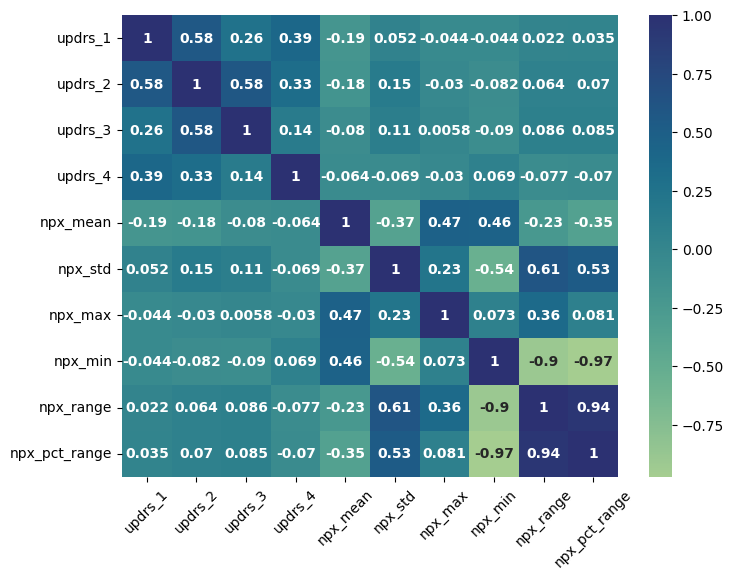

In [151]:
# Correlation among targets
plt.figure(figsize=(8, 6))
sns.heatmap(df_eda.filter(regex="npx_|updrs_*").corr(), cmap="crest", annot=True, annot_kws={"fontweight": "bold"})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Mean of NPX shows slight negative correlation with updrs targets

Stadnard deviation of NPX shows slight positive correlation with updrs 1-3

In [152]:
df_eda = df_prot.groupby("visit_id").mean()
df_eda = df_eda.groupby("visit_month")["NPX"].mean()
df_eda

visit_month
0.0      2.734620e+06
3.0      2.651338e+06
6.0      2.711899e+06
12.0     2.693046e+06
18.0     2.667850e+06
24.0     2.745846e+06
30.0     2.765644e+06
36.0     2.708936e+06
48.0     2.710010e+06
54.0     2.985594e+06
60.0     2.667384e+06
72.0     2.505518e+06
84.0     2.599790e+06
96.0     2.797838e+06
108.0    2.762922e+06
Name: NPX, dtype: float64

Max timestamp : 54.0


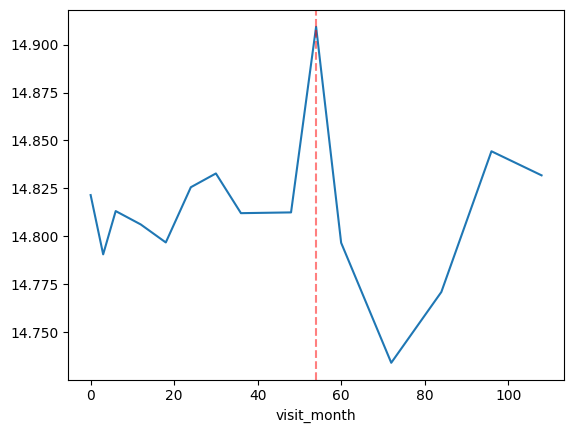

In [153]:
print("Max timestamp :", df_eda.index[df_eda.argmax()])
sns.lineplot(x=df_eda.index.astype("int32"), y=np.log1p(df_eda.values))
plt.axvline(df_eda.index[df_eda.argmax()], color="red", alpha=0.5, linestyle="--")
plt.show()

In [154]:
# Total
counter = Counter()
for i in df_prot.groupby("patient_id")["UniProt"].apply(list):
    counter += Counter(set(i))
print("Common proteins ratio by patient")
(np.array(list(counter.values())) == len(df_prot.groupby("patient_id")["UniProt"].apply(list))).mean().round(5)

Common proteins ratio by patient


0.56828

In [155]:
# By patient, By month
df_eda = df_prot.groupby(["patient_id", "visit_month"])["UniProt"].apply(list)
tmp = []
for i in df_eda.index.get_level_values(0):
    counter = Counter()
    for j in df_eda.loc[i].index:
        counter += Counter(set(df_eda.loc[i].loc[j]))
    tmp.append((np.array(list(counter.values())) == len(df_eda.loc[i])).mean().round(5))
print("Common proteins by patient & month")
pd.Series(tmp).describe()

Common proteins by patient & month


count    1113.000000
mean        0.854919
std         0.079192
min         0.165920
25%         0.831110
50%         0.869960
75%         0.899080
max         1.000000
dtype: float64

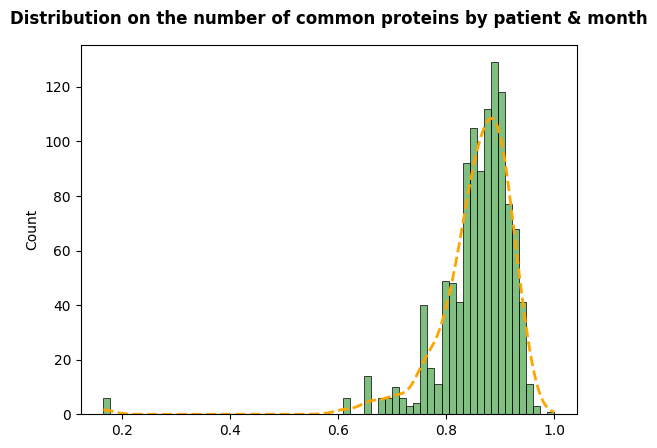

In [156]:
ax = sns.histplot(tmp, kde=True, color="green", line_kws={'linewidth': 2, 'linestyle': '--'})
ax.lines[0].set_color('orange')
plt.title(f"Distribution on the number of common proteins by patient & month", fontweight="bold", pad=15)
plt.show()

By patient & month, common protein exists (about 85%)

SUMMARY OF PROTEIN DATA -


NPX seems to increase exponentialy (After log transformation, it shapes normal distribution)

By patient, average of mean is about 11.88

In view of patient, It looks like perfectly noraml distribution more than overall NPX

Some proteins shows high NPX values than others

Therefore, it is important which protein the patient has

Mean of NPX shows slight negative correlation with updrs targets

Stadnard deviation of NPX shows slight positive correlation with updrs 1-3

3. PEPTIDE ANALYSIS

In [157]:
df_pept = pd.read_csv("train_peptides.csv")
df_pept = df_pept.rename(columns={"PeptideAbundance": "PA"})
df_pept.head(10)

,visit_id,visit_month,patient_id,UniProt,Peptide,PA
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7
5,55_0,0,55,O00533,TLKIENVSYQDKGNYR,23216.5
6,55_0,0,55,O00533,VIAVNEVGR,170878.0
7,55_0,0,55,O00533,VMTPAVYAPYDVK,148771.0
8,55_0,0,55,O00533,VNGSPVDNHPFAGDVVFPR,55202.1
9,55_0,0,55,O00584,ELDLNSVLLK,27229.3


In [158]:
df_pept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981834 entries, 0 to 981833
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   visit_id     981834 non-null  object 
 1   visit_month  981834 non-null  int64  
 2   patient_id   981834 non-null  int64  
 3   UniProt      981834 non-null  object 
 4   Peptide      981834 non-null  object 
 5   PA           981834 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 44.9+ MB


In [159]:
df_pept.isna().sum()

visit_id       0
visit_month    0
patient_id     0
UniProt        0
Peptide        0
PA             0
dtype: int64

In [160]:
df_pept.nunique()

visit_id         1113
visit_month        15
patient_id        248
UniProt           227
Peptide           968
PA             738931
dtype: int64

In [161]:
df_eda = df_pept.groupby("patient_id")["UniProt"].size()
df_eda.describe()

count     248.000000
mean     3959.008065
std      1395.119518
min       876.000000
25%      2749.000000
50%      3637.000000
75%      4609.750000
max      8272.000000
Name: UniProt, dtype: float64

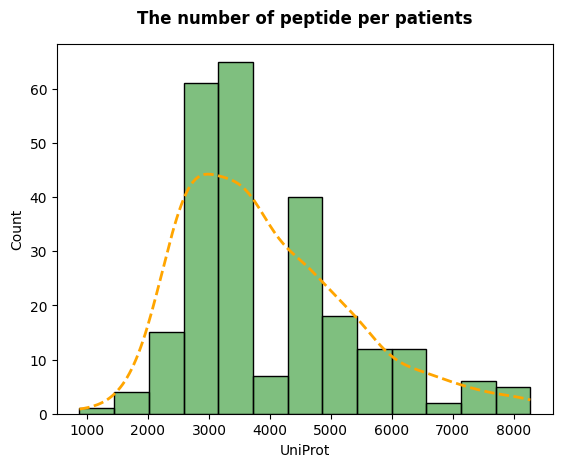

In [162]:
ax = sns.histplot(df_eda, kde=True, color="green", line_kws={'linewidth': 2, 'linestyle': '--'})
ax.lines[0].set_color('orange')
plt.title(f"The number of peptide per patients", fontweight="bold", pad=15)
plt.show()

count    9.818340e+05
mean     6.428902e+05
std      3.377989e+06
min      1.099850e+01
25%      2.817425e+04
50%      7.430830e+04
75%      2.213388e+05
max      1.787520e+08
Name: PA, dtype: float64

<Axes: xlabel='PA'>

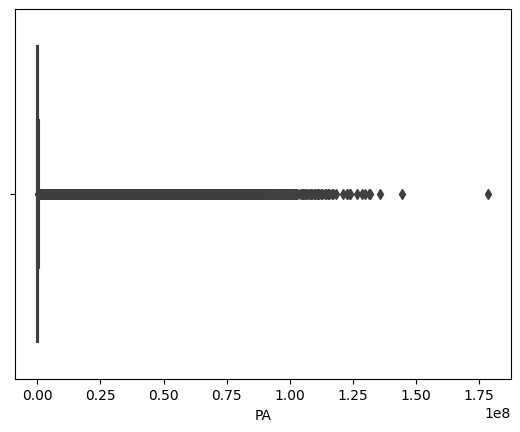

In [163]:
# No Trasnformation
display(df_pept["PA"].describe())
sns.boxplot(x=df_pept["PA"])

count    981834.000000
mean         11.381495
std           1.703017
min           2.484782
25%          10.246199
50%          11.215991
75%          12.307454
max          19.001510
Name: PA, dtype: float64

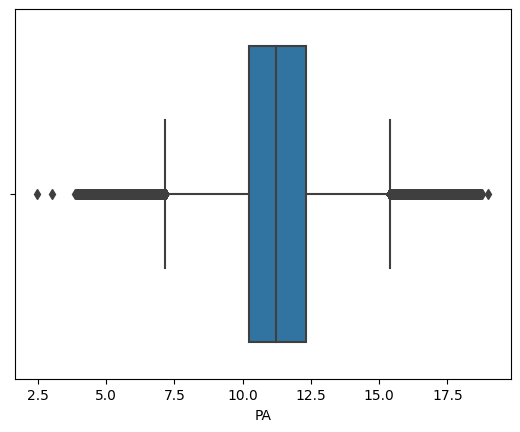

In [164]:
# Log Transformation
display(np.log1p(df_pept["PA"]).describe())
sns.boxplot(x=np.log1p(df_pept["PA"]))
plt.show()

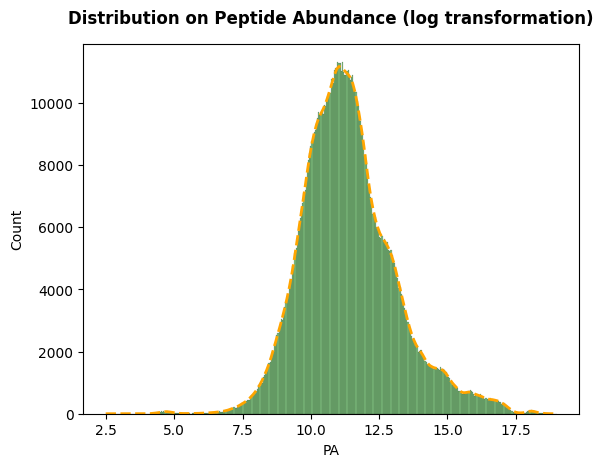

In [165]:
ax = sns.histplot(np.log1p(df_pept["PA"]), kde=True, color="green", line_kws={'linewidth': 2, 'linestyle': '--'})
ax.lines[0].set_color('orange')
plt.title(f"Distribution on Peptide Abundance (log transformation)", fontweight="bold", pad=15)
plt.show()

Peptide Abundance seems to increase exponentialy (After log transformation, it shapes normal distribution)

In [166]:
df_eda = df_pept.copy()
df_eda["PA"] = np.log1p(df_eda["PA"])
df_eda = df_eda.groupby("patient_id")["PA"].mean()
df_eda.describe()

count    248.000000
mean      11.383444
std        0.115610
min       10.981070
25%       11.307803
50%       11.380168
75%       11.459764
max       11.741726
Name: PA, dtype: float64

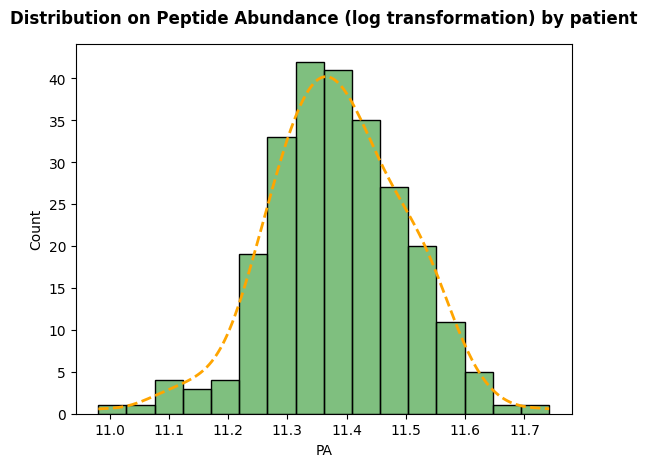

In [167]:
ax = sns.histplot(df_eda, kde=True, color="green", line_kws={'linewidth': 2, 'linestyle': '--'})
ax.lines[0].set_color('orange')
plt.title(f"Distribution on Peptide Abundance (log transformation) by patient", fontweight="bold", pad=15)
plt.show()

By patient, average of mean is about 11.38

In [168]:
df_eda = df_pept.copy()
df_eda["PA"] = np.log1p(df_eda["PA"])
df_eda = df_eda.groupby("UniProt")["PA"].mean()
df_eda.describe()

count    227.000000
mean      10.720606
std        1.304124
min        7.591763
25%        9.822391
50%       10.519933
75%       11.418181
max       15.445637
Name: PA, dtype: float64

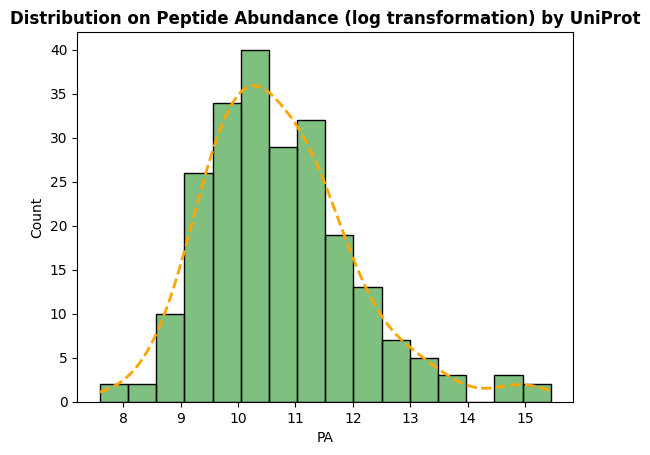

In [169]:
ax = sns.histplot(df_eda, kde=True, color="green", line_kws={'linewidth': 2, 'linestyle': '--'})
ax.lines[0].set_color('orange')
plt.title(f"Distribution on Peptide Abundance (log transformation) by UniProt", fontweight="bold")
plt.show()

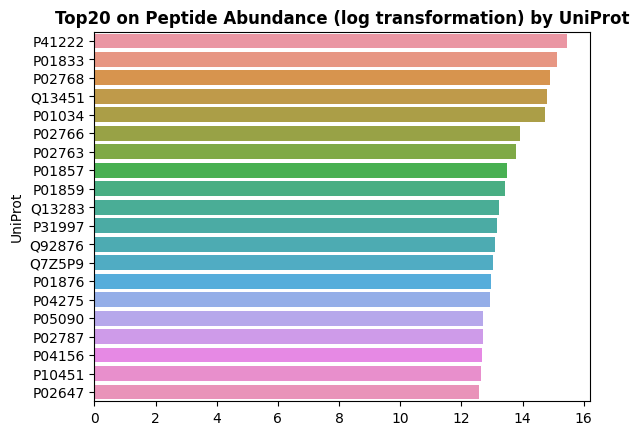

In [170]:
sns.barplot(x=df_eda.sort_values(ascending=False).values[:20], y=df_eda.sort_values(ascending=False).index[:20])
plt.title(f"Top20 on Peptide Abundance (log transformation) by UniProt", fontweight="bold")
plt.show()

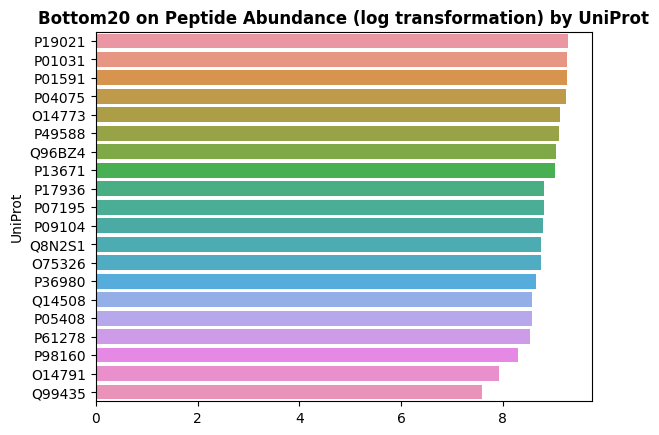

In [171]:
sns.barplot(x=df_eda.sort_values(ascending=False).values[-20:], y=df_eda.sort_values(ascending=False).index[-20::])
plt.title(f"Bottom20 on Peptide Abundance (log transformation) by UniProt", fontweight="bold")
plt.show()

Some proteins shows high Peptide Abundance values than others

Therefore, it is important which peptide the patient has

In [172]:
tmp = df_pept.copy()
tmp["PA"] = np.log1p(tmp["PA"])

df_eda = df_clinic.merge(tmp.groupby("visit_id").mean().rename(columns={"PA": "pa_mean"}), on="visit_id", how="left").dropna()
df_eda = df_eda.merge(tmp.groupby("visit_id").std().rename(columns={"PA": "pa_std"}), on="visit_id", how="left").dropna()
df_eda = df_eda.merge(tmp.groupby("visit_id").max().rename(columns={"PA": "pa_max"}), on="visit_id", how="left").dropna()
df_eda = df_eda.merge(tmp.groupby("visit_id").min().rename(columns={"PA": "pa_min"}), on="visit_id", how="left").dropna()
df_eda = df_eda.merge((tmp.groupby("visit_id")[["PA"]].max() - tmp.groupby("visit_id")[["PA"]].min()).rename(columns={"PA": "pa_range"}), on="visit_id", how="left").dropna()
df_eda = df_eda.merge(((tmp.groupby("visit_id")[["PA"]].max() - tmp.groupby("visit_id")[["PA"]].min()) / tmp.groupby("visit_id")[["PA"]].min()).rename(columns={"PA": "pa_pct_range"}), on="visit_id", how="left").dropna()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10772\1560708197.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'patient_id_x', 'visit_month_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_eda = df_eda.merge(tmp.groupby("visit_id").max().rename(columns={"PA": "pa_max"}), on="visit_id", how="left").dropna()


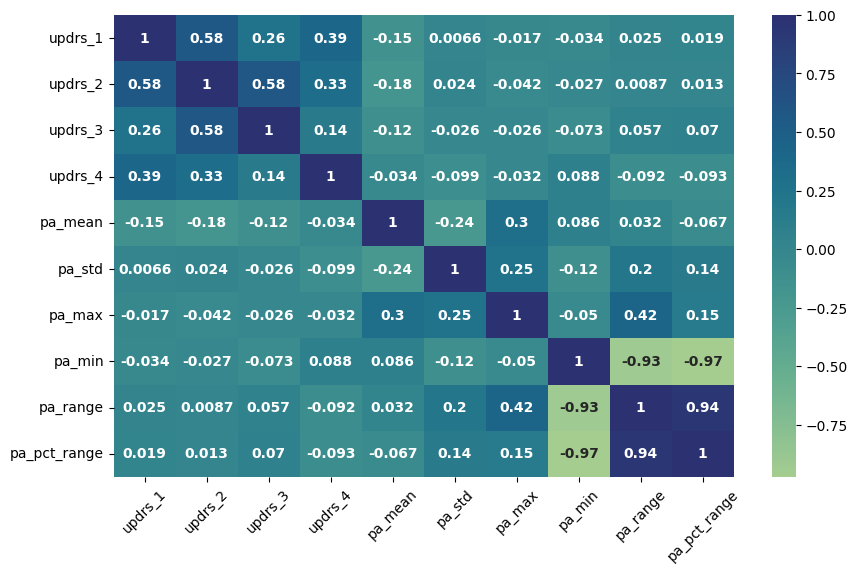

In [173]:
# Correlation among targets
plt.figure(figsize=(10, 6))
sns.heatmap(df_eda.filter(regex="pa_|updrs_*").corr(), cmap="crest", annot=True, annot_kws={"fontweight": "bold"})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Mean of Peptide Abundance shows slight negative correlation with updrs targets

Stadnard deviation of Peptide Abundance doesn't show any correlation with updrs targets (corr < 0.1)

In [174]:
df_eda = df_pept.groupby("visit_id").mean()
df_eda = df_eda.groupby("visit_month")["PA"].mean()
df_eda

visit_month
0.0      650386.068696
3.0      619360.170742
6.0      636938.699685
12.0     639687.281907
18.0     654970.506606
24.0     656552.704432
30.0     654303.349547
36.0     645968.251474
48.0     646182.336195
54.0     693198.849899
60.0     629561.489725
72.0     591345.232761
84.0     613440.644155
96.0     653125.881177
108.0    651031.377570
Name: PA, dtype: float64

Max timestamp : 54.0


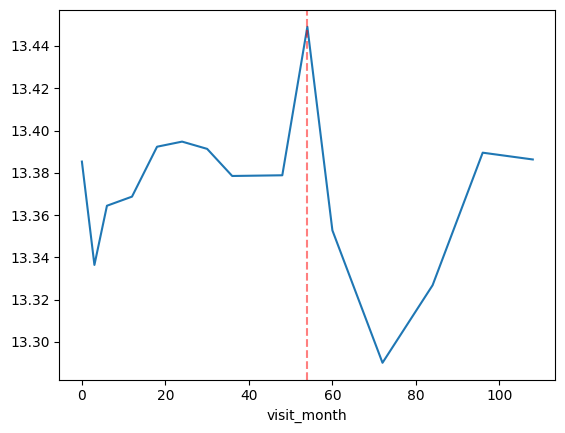

In [175]:
print("Max timestamp :", df_eda.index[df_eda.argmax()])
sns.lineplot(x=df_eda.index.astype("int32"), y=np.log1p(df_eda.values))
plt.axvline(df_eda.index[df_eda.argmax()], color="red", alpha=0.5, linestyle="--")
plt.show()

In [176]:
# Total
counter = Counter()
for i in df_pept.groupby("patient_id")["UniProt"].apply(list):
    counter += Counter(set(i))
print("Common proteins ratio by patient")
(np.array(list(counter.values())) == len(df_pept.groupby("patient_id")["UniProt"].apply(list))).mean().round(5)

Common proteins ratio by patient


0.56828

In [177]:
# By patient, By month
df_eda = df_pept.groupby(["patient_id", "visit_month"])["UniProt"].apply(list)
tmp = []
for i in df_eda.index.get_level_values(0):
    counter = Counter()
    for j in df_eda.loc[i].index:
        counter += Counter(set(df_eda.loc[i].loc[j]))
    tmp.append((np.array(list(counter.values())) == len(df_eda.loc[i])).mean().round(5))
print("Common proteins by patient & month")
pd.Series(tmp).describe()

Common proteins by patient & month


count    1113.000000
mean        0.854919
std         0.079192
min         0.165920
25%         0.831110
50%         0.869960
75%         0.899080
max         1.000000
dtype: float64

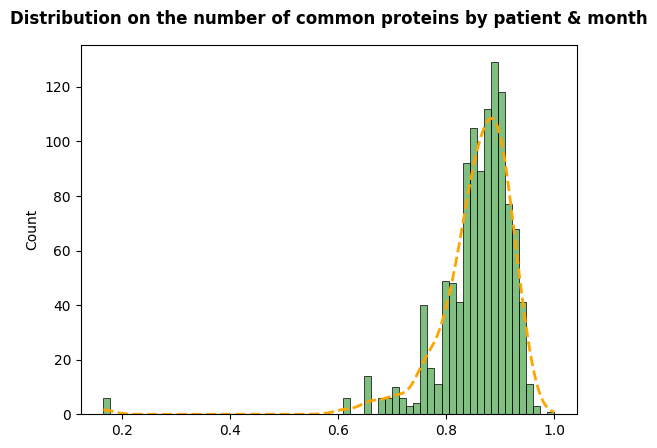

In [178]:
ax = sns.histplot(tmp, kde=True, color="green", line_kws={'linewidth': 2, 'linestyle': '--'})
ax.lines[0].set_color('orange')
plt.title(f"Distribution on the number of common proteins by patient & month", fontweight="bold", pad=15)
plt.show()

SUMMARY OF PEPTIDE DATA - 


Peptide Abundance seems to increase exponentialy (After log transformation, it shapes normal distribution)

By patient, average of mean is about 11.38

Some proteins shows high Peptide Abundance values than others

Therefore, it is important which peptide the patient has

Mean of Peptide Abundance shows slight negative correlation with updrs targets

Stadnard deviation of Peptide Abundance doesn't show any correlation with updrs targets (corr < 0.1)

4. MERGE PROTEIN-PEPTIDE ANALYSIS

In [179]:
df_prot2 = df_prot.groupby("patient_id", as_index=False).agg({'UniProt': list, 'NPX': list})
df_pept2 = df_pept.groupby("patient_id", as_index=False).agg({'UniProt': list, 'PA': list})
df_join = pd.merge(df_prot2, df_pept2, on="patient_id", how="inner").set_index("patient_id")

In [180]:
df_join.head(5)

,UniProt_x,NPX,UniProt_y,PA
patient_id,,,,
55,"[O00391, O00533, O00584, O14498, O14773, O1479...","[11254.3, 732430.0, 39585.8, 41526.9, 31238.0,...","[O00391, O00533, O00533, O00533, O00533, O0053...","[11254.3, 102060.0, 174185.0, 27278.9, 30838.7..."
942,"[O00391, O00533, O00584, O14498, O14773, O1479...","[11218.7, 399518.0, 20581.0, 31290.9, 6173.58,...","[O00391, O00533, O00533, O00533, O00533, O0053...","[11218.7, 44187.4, 106295.0, 17013.7, 15552.1,..."
1517,"[O00391, O00533, O00584, O14773, O14791, O1524...","[11648.9, 419015.0, 35053.8, 17466.3, 2784.4, ...","[O00391, O00533, O00533, O00533, O00533, O0053...","[11648.9, 63593.4, 99566.6, 16351.0, 15566.0, ..."
1923,"[O00391, O00533, O00584, O14773, O15240, O1539...","[21361.8, 866985.0, 32035.1, 13373.1, 269106.0...","[O00391, O00533, O00533, O00533, O00533, O0053...","[21361.8, 143149.0, 183035.0, 40231.7, 45931.1..."
2660,"[O00533, O00584, O14498, O14773, O14791, O1524...","[579829.0, 28259.8, 29883.2, 19134.1, 1884.61,...","[O00533, O00533, O00533, O00533, O00533, O0053...","[62913.2, 202217.0, 32707.7, 27432.2, 21862.0,..."


In [181]:
tmp = {"npx": [], "pa": []}
for i in df_join.index:
    row = df_join.loc[i]
    tmp["npx"].append(np.log1p(row["NPX"]).mean())
    tmp["pa"].append(np.log1p(row["PA"]).mean())
tmp = pd.DataFrame(tmp)

In [182]:
pd.DataFrame(tmp).corr().iloc[0, 1]

0.9288870222623901

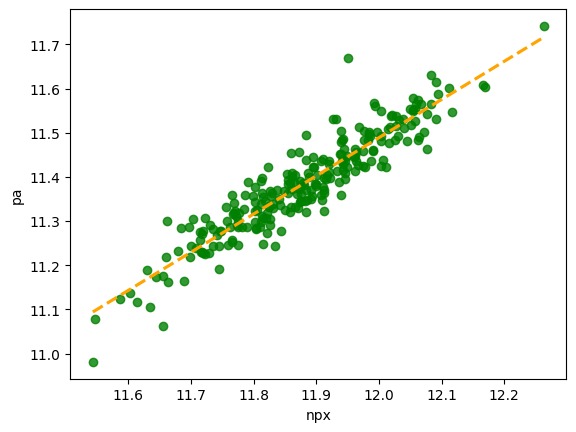

In [183]:
sns.regplot(x=tmp["npx"], y=tmp["pa"], color="green", ci=None, line_kws={"color": "orange", "linestyle": "--"})
plt.show()

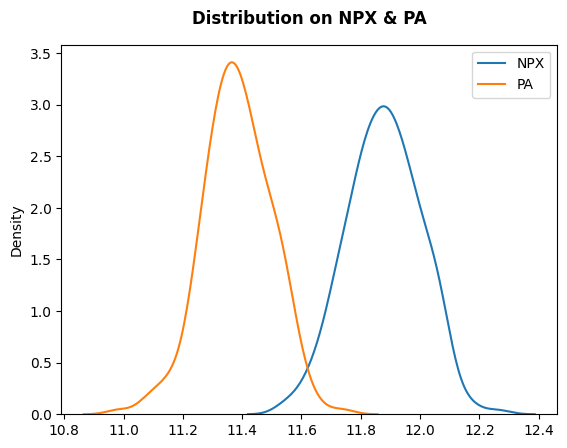

In [184]:
ax = sns.kdeplot(tmp["npx"])
sns.kdeplot(tmp["pa"], ax=ax)
ax.set_xlabel("")
plt.legend(["NPX", "PA"])
plt.title(f"Distribution on NPX & PA", fontweight="bold", pad=15)
plt.show()

NPA & PA are strong positive correlation (mean gropuby patient)

In [185]:
# Outer join on visit id
df_prot2 = df_prot.groupby("visit_id", as_index=False).agg({'UniProt': list, 'NPX': list})
df_pept2 = df_pept.groupby("visit_id", as_index=False).agg({'UniProt': list, 'PA': list})
df_join = pd.merge(df_prot2, df_pept2, on="visit_id", how="outer").set_index("visit_id")
df_join

,UniProt_x,NPX,UniProt_y,PA
visit_id,,,,
10053_0,"[O00391, O00533, O14773, O14791, O15240, O1539...","[9104.27, 402321.0, 7150.57, 2497.84, 83002.9,...","[O00391, O00533, O00533, O00533, O00533, O0053...","[9104.27, 60615.1, 134795.0, 24299.0, 17715.2,..."
10053_12,"[O00391, O00533, O15240, O15394, O43505, O6088...","[10464.2, 435586.0, 197117.0, 15099.1, 164268....","[O00391, O00533, O00533, O00533, O00533, O0053...","[10464.2, 69318.8, 171397.0, 20462.6, 15614.2,..."
10053_18,"[O00391, O00533, O00584, O14498, O14791, O1524...","[13235.7, 507386.0, 7126.96, 24525.7, 2372.71,...","[O00391, O00533, O00533, O00533, O00533, O0053...","[13235.7, 85129.6, 135717.0, 21854.4, 24246.1,..."
10138_12,"[O00391, O00533, O00584, O14498, O14773, O1479...","[12600.2, 494581.0, 9165.06, 27193.5, 22506.1,...","[O00391, O00533, O00533, O00533, O00533, O0053...","[12600.2, 71619.8, 114132.0, 17616.5, 20517.5,..."
10138_24,"[O00391, O00533, O00584, O14498, O14773, O1479...","[12003.2, 522138.0, 4498.51, 17189.8, 29112.4,...","[O00391, O00533, O00533, O00533, O00533, O0053...","[12003.2, 92180.5, 130398.0, 27983.8, 18453.9,..."
...,...,...,...,...
8699_24,"[O00391, O00533, O00584, O14773, O14791, O1524...","[9983.0, 400290.0, 24240.1, 16943.5, 6303.17, ...","[O00391, O00533, O00533, O00533, O00533, O0053...","[9983.0, 53629.2, 98166.7, 26308.1, 21429.3, 2..."
942_12,"[O00391, O00533, O00584, O14498, O14773, O1479...","[6757.32, 360858.0, 18367.6, 14760.7, 18603.4,...","[O00391, O00533, O00533, O00533, O00533, O0053...","[6757.32, 50137.1, 94688.6, 15849.4, 16954.8, ..."
942_24,"[O00533, O00584, O14498, O14773, O14791, O1524...","[352722.0, 22834.9, 23393.1, 16693.5, 1487.91,...","[O00533, O00533, O00533, O00533, O00533, O0053...","[41053.8, 111577.0, 15029.4, 18044.4, 10682.6,..."


In [186]:
df_join.isna().sum()

UniProt_x    0
NPX          0
UniProt_y    0
PA           0
dtype: int64

In [187]:
df_clinic["visit_id"].isin(df_join.index).sum() / len(df_clinic["visit_id"])

0.22075237701529557

In [188]:
df_clinic["visit_id"].isin(df_prot["visit_id"].values).sum() / len(df_clinic["visit_id"])

0.22075237701529557

In [189]:
df_clinic["visit_id"].isin(df_pept["visit_id"].values).sum() / len(df_clinic["visit_id"])

0.22075237701529557

In [190]:
df_join.index.isin(df_clinic["visit_id"].values).sum() / len(df_join)

0.9595687331536388

In [191]:
df_prot["visit_id"].isin(df_clinic["visit_id"].values).sum() / len(df_prot)

0.9592981039009028

In [192]:
df_pept["visit_id"].isin(df_clinic["visit_id"].values).sum() / len(df_pept)

0.9591682504374467

Only about 22% visit id has protein & peptide information

Not all protein & peptide information are mathed to clinic data

In [193]:
# Outer join on visit id
df_prot2 = df_prot.groupby("patient_id", as_index=False).agg({'UniProt': list, 'NPX': list})
df_pept2 = df_pept.groupby("patient_id", as_index=False).agg({'UniProt': list, 'PA': list})
df_join = pd.merge(df_prot2, df_pept2, on="patient_id", how="outer").set_index("patient_id")

In [194]:
pd.Series(df_clinic["patient_id"].unique()).isin(df_join.index).sum() / df_clinic["patient_id"].nunique()

0.2433758586849853

In [195]:
df_tmp = df_clinic.dropna().groupby("patient_id", as_index=False).mean().merge(df_join.reset_index(), on="patient_id", how="left")
df_tmp

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,CSF,UniProt_x,NPX,UniProt_y,PA
0,55,33.300000,13.600000,14.700000,45.800000,0.000000,1.0,"[O00391, O00533, O00584, O14498, O14773, O1479...","[11254.3, 732430.0, 39585.8, 41526.9, 31238.0,...","[O00391, O00533, O00533, O00533, O00533, O0053...","[11254.3, 102060.0, 174185.0, 27278.9, 30838.7..."
1,75,36.000000,1.000000,8.000000,38.000000,0.000000,0.0,NaN,NaN,NaN,NaN
2,337,18.000000,6.500000,7.000000,7.000000,0.000000,0.0,NaN,NaN,NaN,NaN
3,527,36.000000,2.000000,18.000000,22.000000,0.000000,0.0,NaN,NaN,NaN,NaN
4,557,36.000000,6.000000,9.000000,17.000000,0.000000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
555,64938,18.000000,4.250000,7.500000,21.000000,0.000000,0.0,NaN,NaN,NaN,NaN
556,65006,36.000000,26.000000,20.000000,31.000000,6.000000,0.0,NaN,NaN,NaN,NaN
557,65043,42.272727,4.818182,7.272727,12.363636,0.545455,1.0,"[O00391, O00533, O00584, O14498, O14773, O1479...","[13472.4, 927954.0, 42661.5, 43663.2, 20071.3,...","[O00391, O00533, O00533, O00533, O00533, O0053...","[13472.4, 158777.0, 51184.3, 55708.4, 53159.7,..."
558,65290,22.000000,3.333333,14.333333,13.333333,0.666667,0.0,NaN,NaN,NaN,NaN


In [196]:
df_tmp.isna().sum()

patient_id       0
visit_month      0
updrs_1          0
updrs_2          0
updrs_3          0
updrs_4          0
CSF              0
UniProt_x      405
NPX            405
UniProt_y      405
PA             405
dtype: int64

In [197]:
from collections import Counter
df_prot["UniProt"].value_counts(normalize=True)

P01024    0.004782
P05090    0.004782
P01011    0.004782
P01023    0.004782
Q92520    0.004782
            ...   
Q6UX71    0.002840
P01780    0.002810
Q562R1    0.002647
Q99832    0.002604
Q99829    0.002101
Name: UniProt, Length: 227, dtype: float64

In [198]:
df_pept["UniProt"].value_counts(normalize=True)

P02787    0.052877
P02768    0.041657
P01024    0.035905
P02751    0.027876
P02649    0.023509
            ...   
Q6UX71    0.000673
P01780    0.000666
Q562R1    0.000627
Q99832    0.000617
Q99829    0.000498
Name: UniProt, Length: 227, dtype: float64

It is hard to say that 'There are some common protein or peptide among patients'

In [199]:
df_eda = df_prot.groupby("visit_id")["UniProt"].apply(list).to_frame()
df_eda["month"] = pd.Series(df_eda.index.values).apply(lambda x: x.split("_")[1]).values

In [200]:
prot_dic = {}
for i in sorted(df_eda["month"].unique()):
    counter = Counter()
    for j in df_eda.loc[df_eda["month"] == i, "UniProt"].to_list():
        counter += Counter(set(j))
    total = sum(counter.values())
    for k, v in counter.items(): counter[k] = v / total
    prot_dic[i] = counter.most_common(1)[0]

In [201]:
prot_dic

{'0': ('P02753', 0.004779855618794195),
 '108': ('P00746', 0.004678362573099415),
 '12': ('P02753', 0.004804227720393947),
 '18': ('P13521', 0.004828002414001207),
 '24': ('P02753', 0.004775707384403037),
 '3': ('P00746', 0.0046801872074883),
 '30': ('P00746', 0.004629629629629629),
 '36': ('Q12805', 0.004782385415329311),
 '48': ('P13521', 0.004785352659685138),
 '54': ('P00746', 0.004784688995215311),
 '6': ('P00746', 0.004770882228463699),
 '60': ('P00746', 0.0047803323469155475),
 '72': ('P00746', 0.004765146358066712),
 '84': ('P00746', 0.004770992366412214),
 '96': ('P00746', 0.004728132387706856)}

In [202]:
df_eda = df_pept.groupby("visit_id")["UniProt"].apply(list).to_frame()
df_eda["month"] = pd.Series(df_eda.index.values).apply(lambda x: x.split("_")[1]).values

In [203]:
prot_dic = {}
for i in sorted(df_eda["month"].unique()):
    counter = Counter()
    for j in df_eda.loc[df_eda["month"] == i, "UniProt"].to_list():
        counter += Counter(set(j))
    total = sum(counter.values())
    for k, v in counter.items(): counter[k] = v / total
    prot_dic[i] = counter.most_common(1)[0]

In [204]:
prot_dic

{'0': ('P02753', 0.004779855618794195),
 '108': ('P00746', 0.004678362573099415),
 '12': ('P02753', 0.004804227720393947),
 '18': ('P13521', 0.004828002414001207),
 '24': ('P02753', 0.004775707384403037),
 '3': ('P00746', 0.0046801872074883),
 '30': ('P00746', 0.004629629629629629),
 '36': ('Q12805', 0.004782385415329311),
 '48': ('P13521', 0.004785352659685138),
 '54': ('P00746', 0.004784688995215311),
 '6': ('P00746', 0.004770882228463699),
 '60': ('P00746', 0.0047803323469155475),
 '72': ('P00746', 0.004765146358066712),
 '84': ('P00746', 0.004770992366412214),
 '96': ('P00746', 0.004728132387706856)}

It is hard to say that 'There are some common protein or peptide among months'